# How to get access to the planetary_data_2.txt file

In [ ]:
import os
os.getcwd


In [ ]:
def fetch_data():
  import os, shutil
  cwd = os.getcwd()
  if os.path.exists("CosmicAI_WinterSchool"):
    shutil.rmtree("CosmicAI_WinterSchool")
  !git clone https://github.com/aliawofford9317/CosmicAI_WinterSchool.git
  for file in os.listdir("CosmicAI_WinterSchool"):
    if file.endswith((".txt",".csv")):
      shutil.copy("CosmicAI_WinterSchool/{}".format(file),cwd)
fetch_data()

Cloning into 'CosmicAI_WinterSchool'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 79 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 8.50 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (21/21), done.


##  Manipulating Data Exercises for .txt and .csv




### Exercise 1

Objective Add all the masses from the planets found in the file planetary_data_2.txt. You can use a for loop similar to the code from notebook 3a.

1. Read the data from planetary_data_2.txt, split the data by planet.
2. Create a new list for every planet and add it to a nested list called `list_planets`. This list contains a list of all the planets and its data.

3. Write a script that gets an integer number from the user using `input()`.
4. Return one of the planets from the list, where the index number is the number entered by the user.

In [ ]:
## USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

Exercise 2
1. Create a script that writes numbers from 1 to 100, line by line to a text file.


In [ ]:
## USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

## FITS File Exercises

In [ ]:
# Import required libraries and configure inline plotting for Jupyter notebooks

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

### Exercise 1

Read in the LAT Point Source Catalog i.e (diffuseTabular_full.fits) and make a scatter plot of the Galactic Coordinates of the sources (complete with axis labels). In your plot make the plot go between -180 and 180 instead of 0 and
360 degrees. Note that the Point Source Catalog contains the Galactic
Coordinates, so no need to convert them.
    

In [ ]:
# Access to LAT Point Source Catalog data
!wget -q -O diffuseTabular_full.fits \
   https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/gll_psc_v08.fit
hdulist = fits.open('diffuseTabular_full.fits')

Text(0, 0.5, 'Galactic Latitude')

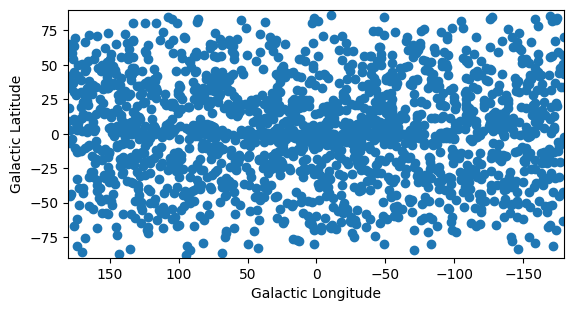

In [ ]:
## USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.

# Read in Point Source Catalog
hdulist = fits.open('diffuseTabular_full.fits')
psc = hdulist[1].data

# Extract Galactic Coordinates
l = hdulist[1].data['GLON']
b = hdulist[1].data['GLAT']

# Coordinates from 0 to 360, wrap to -180 to 180 to match image
l[l > 180.] -= 360.

# Plot the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.scatter(l, b)
ax.set_xlim(180., -180.)
ax.set_ylim(-90., 90.)
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

In [ ]:
# Access to the all-sky plot of the LAT Background Model data
!wget -q -O diffuse_full.fits \
  https://fermi.gsfc.nasa.gov/ssc/data/analysis/software/aux/gll_iem_v02_P6_V11_DIFFUSE.fit
# Open the full FITS
hdulist = fits.open('diffuse_full.fits')


### Exercise 2

Using Matplotlib, make an all-sky plot of the LAT Background Model i.e. (diffuse_full.fits) file in the Plate Carrée projection showing the LAT Point Source Catalog overlaid with markers, and with the correct coordinates on the axes.
You should do this using only ``astropy.io.fits``, Numpy, and Matplotlib (no WCS or coordinate conversion library).

Hint: the -CAR projection is such that the
x pixel position is proportional to longitude, and the y pixel position to
latitude. Bonus points for a pretty colormap.

Text(0, 0.5, 'Galactic Latitude')

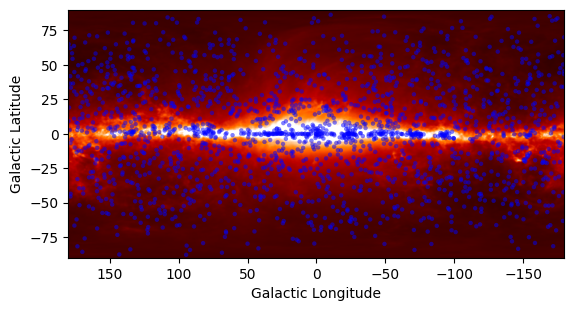

In [ ]:
## USE THIS SPACE TO PASTE YOUR SOLUTIONS FOR THE ABOVE EXERCISE.


# Read in Background Model
hdulist = fits.open('diffuse_full.fits')
bg = hdulist[0].data[0, :, :]

# Read in Point Source Catalog
hdulist = fits.open('diffuseTabular_full.fits')
psc = hdulist[1].data

# Extract Galactic Coordinates
l = hdulist[1].data['GLON']
b = hdulist[1].data['GLAT']

# Coordinates from 0 to 360, wrap to -180 to 180 to match image
l[l > 180.] -= 360.

# Plot the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(bg ** 0.5, extent=[-180., 180., -90., 90.], cmap=plt.cm.gist_heat,
          origin='lower', vmin=0, vmax=2e-3)
ax.scatter(l, b, s=10, edgecolor='none', facecolor='blue', alpha=0.5)
ax.set_xlim(180., -180.)
ax.set_ylim(-90., 90.)
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')